# Sesión 2: Manejo de bases de datos

El proceso de manipulación de las bases de datos estén en el formato que estén es un proceso fundamental para el análisis de datos. 

Las información para el análisis puede proceder de multiples fuentes, desde webs (lo que podemos conocer como webscraping), archivos de imagen, videos, textos, tablas... La característica que presentan las bases de datos (BBDD) es que presentan la información de forma estructurada. En ellas existe una clave primaria o identificador que hace unico cada uno de los datos que vamos a analizar. Cada uno de estos datos se puede relacionar con otras bases de datos mediante otras claves o la misma.

Las bases de datos pueden ser de muchos tipos, pero en definitiva trabajaremos con las bases de datos que seguramente como médicos usáis más que son los archivos excel, SPSS, SAS o CSV.

## Abrir archivos en Python

### Localizar los archivos

Es un proceso importante si realizamos analisis de bases de datos. Si lo que deseamos es leer un archivo el primer paso es localizarlo. Lo más simple es ubicar el archivo en la carpeta en la que estamos ejecutando el script. Otra opción es localizar la ruta exacta en la que se encuentra el archivo y pegarlo.
Por ejemplo si queremos saber el entorno de trabajo en el que estamos trabajando podemos ejecutar el siguiente fragmento de código

In [2]:
# Importamos el paquete os
# (un paquete son un conjunto de scripts que contienen funciones útiles)
import os

# Llamamos a la siguiente función contenida en el paquete os
os.getcwd()

'/Users/adrianvalls/Desktop/Nuevo Curso NNTT'

Entonces tendríamos que encontrar esa localización en nuestro ordenador (ya sea mediante el navegador de carpetas) y poner el archivo que queremos abrir allí.
Otra opción es localizar el archivo y copiar la dirección. Esto lo podemos conseguir clickando con el boton derecho sobre el archivo que queremos localizar mientras pulsamos la letra shift (flecha hacia arriba). Nos dará la opcion copiar como ruta. Ya tenemos copiada la localizacion del archivo dentro del ordenador.

### Leer un archivo CSV

Un archivo .csv (comma separated value) es un tipo muy simple y utilizado para el almacenamiento de datos. En este tipo de archivos cada uno de los datos está separado por una coma, y cada nueva linea o registro está marcada por un salto de linea. Por ejemplo el inicio de un archivo .csv podría ser el siguiente

`nombre,apellidos,edad
Jose,Ramirez Carbó, 30
Josefa,Perez Gutierrez, 45
Sofia,Esteban Sánchez, 69`

Proporcionamos un ejemplo de archivo .csv

In [3]:
# Importamos el paquete pandas dandole un pseudonimo (pd)
import pandas as pd

# Llamamos a la funcion read_csv del paquete pandas y leemos el archivo
iris = pd.read_csv('iris.csv')

# Si el archivo está en la misma carpeta que la que estamos ejecutando el script solo tenemos que indicar el nombre
# Si está localizado en otro lado tendremos que poner el archivo

Y ahora, ¿dónde está lo que hemos leido? Está en la memoria RAM del ordenador guardado como variable 

In [4]:
# Podemos ver los primeros registros de la base de datos

iris.head()

,l_sepalos,a_sepalos,l_petalos,a_petalos,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Leer un archivo .xlsx (o .xls)

Realmente podemos leer los archivos en el formato que tengáis los datos y no cambia demasiado pues pandas es una librería (es equivalente a paquete) muy versátil

In [5]:
# Guardamos la base de datos como iris_x con la funcion read_excel
iris_x = pd.read_excel("iris.xlsx")

### Leer archivos en otros formatos y guardarlos

In [6]:
# Es bastante versátil lo que podemos realizar, leyendo archivos .dta (STATA) o .sav (SPSS)

iris_stat = pd.read_stata("iris.dta")

iris_spss = pd.read_spss("iris.sav")

También podemos guardar los archivos en el formato que deseemos

In [ ]:
# Guardando en .xlsx

iris.to_excel("iris.xlsx")

# Guardando en .stata

iris.to_stata("iris.dta")

# Guardando en .sav. Para ejecutarlo es necesario instalar el paquete pyreadstat

#pyreadstat.write_sav(iris, 'iris.sav')

## Examinando los datos

In [7]:
# Podemos conocer fácilmente el nombre de las columnas

iris.columns

Index(['l_sepalos', 'a_sepalos', 'l_petalos', 'a_petalos', 'clase'], dtype='object')

In [8]:
iris.dtypes

l_sepalos    float64
a_sepalos    float64
l_petalos    float64
a_petalos    float64
clase         object
dtype: object

In [21]:
# Podemos ver los primeros registros

iris.head()

,l_sepalos,a_sepalos,l_petalos,a_petalos,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# O los últimos registros

iris.tail()

,l_sepalos,a_sepalos,l_petalos,a_petalos,clase
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
# Las dimensiones de la base de datos

iris.shape

(150, 5)

Vemos que la base de datos tiene 150 filas y 5 columnas. Siempre en la notacion de Python todo lo que se refiere a las filas es el primer número, mientras que las columnas son el segundo número.

### Seleccionando columnas

In [24]:
# Podemos seleccionar una columna en concreto especificando su nombre

iris.clase

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: clase, Length: 150, dtype: object

In [35]:
# Sin embargo imaginemos que el nombre de las columnas es extraño e incluye tildes y acentos
# NOTA: no es nada recomendable ponerle nombres largos y con acentos a las columnas
# Aun así podemos seleccionar las columnas 

# Una opcion es seleccionarlo por el nombre
iris["clase"]

4      0.2
5      0.4
6      0.3
7      0.2
8      0.2
      ... 
120    2.3
121    2.0
122    2.0
123    1.8
124    2.1
Name: a_petalos, Length: 121, dtype: float64

In [36]:
# Si queremos seleccionar varias columnas por el nombre
iris[["clase", "a_petalos"]]

,clase,a_petalos
0,Iris-setosa,0.2
1,Iris-setosa,0.2
2,Iris-setosa,0.2
3,Iris-setosa,0.2
4,Iris-setosa,0.2
...,...,...
145,Iris-virginica,2.3
146,Iris-virginica,1.9
147,Iris-virginica,2.0
148,Iris-virginica,2.3


### Seleccionando columnas y filas

Para seleccionar columnas y filas podemos usar los métodos .iloc y .loc. El primero nos permite localizar de acuerdo con el índice de la columna, mientras que el segundo lo puede hacer con el nombre de la columna. La nomeclatura que usan ambos métodos es `[fila,columna]`

Veamos algunos ejemplos


In [52]:
# El método .loc nos permite localizar por el nombre que recibe la columna en cuestion
# es importante especificar en primer lugar las filas. Poniendo el simbolo : estamos seleccionando
# las filas desde la primera a la ultima

iris.loc[:,"a_petalos"]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: a_petalos, Length: 150, dtype: float64

In [37]:
# Otra opcion es con el método .iloc, seleccionando la ultima columna
# la nomeclatura es la misma que la indicada con anterioridad, pues selecciona
# todas las filas (:), y despues de la coma seleccionamos la cuarta columna

iris.iloc[:,4]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: clase, Length: 150, dtype: object

In [38]:
# Si por ejemplo queremos seleccionar las filas de la 4 a la 125 y la 3 columna
iris.iloc[4:125,3]

4      0.2
5      0.4
6      0.3
7      0.2
8      0.2
      ... 
120    2.3
121    2.0
122    2.0
123    1.8
124    2.1
Name: a_petalos, Length: 121, dtype: float64

In [40]:
# Si por ejemplo queremos seleccionar las filas de la 4 a la 125 y la 3 y la 2 columna
iris.iloc[4:125,[3,2]]

,a_petalos,l_petalos
4,0.2,1.4
5,0.4,1.7
6,0.3,1.4
7,0.2,1.5
8,0.2,1.4
...,...,...
120,2.3,5.7
121,2.0,4.9
122,2.0,6.7
123,1.8,4.9


## Filtrando columnas

In [42]:
# Podemos filtrar columnas que contengan algun valor determinado
# por ejemplo seleccionando solo una especie determinada

iris[iris.clase=="Iris-setosa"].head()

,l_sepalos,a_sepalos,l_petalos,a_petalos,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Podemos aplicar diferentes clases de filtros, utilizando la lógica aprendida en la lección anterior. En este caso para el operador lógico o se usa la barra `|` (shift+1) mientras que para el operador lógico y se usa el símbolo `&` (shift+6)

In [56]:
# Por ejemplo podríamos filtrar aquellas que sean de la clase Iris setosa y cuya longitud de pétalos sea mayor a 1.5
# es importante recordar que las diferentes cláusulas lógicas deben ir separadas por paréntesis

iris[(iris.clase=="Iris-setosa") & (iris.l_petalos>1.5)]

,l_sepalos,a_sepalos,l_petalos,a_petalos,clase
5,5.4,3.9,1.7,0.4,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa


In [59]:
# Si queremos realizar un filtro que tengan una anchura de sepalos menor de 3 o una longitud de sepalos mayor de 5

iris[(iris.l_sepalos>5)|(iris.a_sepalos<3)].head()

,l_sepalos,a_sepalos,l_petalos,a_petalos,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


In [60]:
# Si queremos que nos muestre a qué clase pertenecen aquellos registros con una l_sepalos>5

iris.clase[iris.l_sepalos>5]

0         Iris-setosa
5         Iris-setosa
10        Iris-setosa
14        Iris-setosa
15        Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: clase, Length: 118, dtype: object

In [61]:
# Otra opcion para hacer lo mismo utilizando el método .loc

iris.loc[iris.l_sepalos>5,"clase"]

0         Iris-setosa
5         Iris-setosa
10        Iris-setosa
14        Iris-setosa
15        Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: clase, Length: 118, dtype: object

### Obtener descripciones numéricas de los datos

Sin embargo puede ser más interesante que obtener la lista completa de registros que cumplen una condicion hacer algunas descripciones simples de los datos, pudiendo utilizar determinados filtros

In [62]:
# El método .describe() nos da las métricas más frecuentemente utilizadas para datos numéricos

iris.describe()

,l_sepalos,a_sepalos,l_petalos,a_petalos
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
# Aplicando el método groupby podemos agrupar y hacer la métrica por casa grupo

iris.groupby("clase").describe()

l_sepalos                                              \
                    count   mean       std  min    25%  50%  75%  max   
clase                                                                   
Iris-setosa          50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor      50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica       50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                a_sepalos         ... l_petalos      a_petalos         \
                    count   mean  ...       75%  max     count   mean   
clase                             ...                                   
Iris-setosa          50.0  3.418  ...     1.575  1.9      50.0  0.244   
Iris-versicolor      50.0  2.770  ...     4.600  5.1      50.0  1.326   
Iris-virginica       50.0  2.974  ...     5.875  6.9      50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
clase                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [71]:
# Si por ejemplo queremos obtener la mediana de todas las variables numéricas

iris.median()

l_sepalos    5.80
a_sepalos    3.00
l_petalos    4.35
a_petalos    1.30
dtype: float64

In [72]:
# Si solo queremos conocer la media de a_petalos

iris.a_petalos.mean()

1.1986666666666672

In [73]:
# Si lo que queremos es realizar una descripción por grupos de la mediana

iris.groupby("clase").median()

,l_sepalos,a_sepalos,l_petalos,a_petalos
clase,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


Para realizar algunas tareas más complejas vamos a utilizar otra base de datos

In [74]:
# Leemos el archivo

student = pd.read_csv("student-mat.csv")

In [75]:
student.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


Vaya! No se ha leido bien el archivo. Esto es porque aunque sea un archivo .csv el separador no es una coma, sino un punto y coma (;). En los archivos .csv el separador no siempre es una coma, en ocasiones puede ser un punto y coma, o incluso el tabulador (4 espacios). Para que lo lea bien debemos especificar exactamente 

In [76]:
# Leemos de nuevo el archivo, especificando cual es el separador que vamos a emplear

student = pd.read_csv("student-mat.csv", sep = ";")

In [77]:
# Como vemos a continuación sí que se ha leido bien

student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [79]:
# En variables categóricas podemos hacer tablas cruzadas mediante el método crosstab de pandas

pd.crosstab(student.school,student.sex)

sex,F,M
school,,
GP,183,166
MS,25,21


In [80]:
# Podemos complicar un poco la tabla cruzada, mostrando las distribuciones marginales
# para ello tenemos que especificar que queremos mostrar los márgenes y que el nombre de dichos
# márgenes es Total

pd.crosstab(student.school, student.sex, margins = True, margins_name = "Total")

sex,F,M,Total
school,,,
GP,183,166,349
MS,25,21,46
Total,208,187,395


### Modificando la tabla

Podemos modificar los datos desde multiplicar, sumar o restar las columnas hasta realizar categorizaciones

Por ejemplo imaginémonos que en los datos de las flores, queremos modificar los datos, si suponemos que las longitudes están en cm, podemos quere pasarlo a mm y después suponiendo que las hojas sean cuadradas, queremos obtener el área

In [88]:
# Multiplicamos las 4 primeras columnas por 100

iris.iloc[:,0:4] = iris.iloc[:,0:4]*100

In [98]:
# Calculamos el área

iris["area_sepalos"] = iris["l_sepalos"]*iris["a_sepalos"]
iris["area_petalos"] = iris["l_petalos"]*iris["a_petalos"]

<bound method DataFrame.aggregate of      l_sepalos  a_sepalos  l_petalos  a_petalos           clase  area_sepalos  \
0        510.0      350.0      140.0       20.0     Iris-setosa      178500.0   
1        490.0      300.0      140.0       20.0     Iris-setosa      147000.0   
2        470.0      320.0      130.0       20.0     Iris-setosa      150400.0   
3        460.0      310.0      150.0       20.0     Iris-setosa      142600.0   
4        500.0      360.0      140.0       20.0     Iris-setosa      180000.0   
..         ...        ...        ...        ...             ...           ...   
145      670.0      300.0      520.0      230.0  Iris-virginica      201000.0   
146      630.0      250.0      500.0      190.0  Iris-virginica      157500.0   
147      650.0      300.0      520.0      200.0  Iris-virginica      195000.0   
148      620.0      340.0      540.0      230.0  Iris-virginica      210800.0   
149      590.0      300.0      510.0      180.0  Iris-virginica      177

In [101]:
# Podemos hacer una descripción de las columnas con la función .agg y realizando agrupación de 

iris.groupby("clase").agg({"area_sepalos":["mean", "min", "max"], "area_petalos":["median", "min", "max"]})

area_sepalos                     area_petalos           \
                        mean       min       max       median      min   
clase                                                                    
Iris-setosa         172088.0  103500.0  250800.0       3000.0   1100.0   
Iris-versicolor     165262.0  100000.0  224000.0      56150.0  33000.0   
Iris-virginica      196846.0  122500.0  300200.0     114450.0  75000.0   

                           
                      max  
clase                      
Iris-setosa        9600.0  
Iris-versicolor   86400.0  
Iris-virginica   158700.0

In [109]:
# También podemos crear nuevas categorizaciones
# para ello seleccionamos la columna de area_sepalos
# sobre ella le aplicamos una funcion
# para aplicar una funcion en una linea utilizamos el comando lambda
# sobre este decimos qué tiene que hacer. 
# Devolver un valor de True si el área es mayor de 200000 y de falso de lo contrario

iris["sep_grande"] = iris.area_sepalos.apply(lambda x: True if x > 200000 else False)

In [117]:
# Hacemos una descripción de los datos

pd.crosstab(iris.clase, iris.sep_grande)

sep_grande,False,True
clase,,
Iris-setosa,43,7
Iris-versicolor,42,8
Iris-virginica,24,26


Vemos que la especie de Iris Virginica tiene unos sepalos grandes

In [127]:
# Imaginemos ahora que queremos hacer una clasificación relativa del area de los sépalos, 
# de tal modo que si es setosa consideramos un area grande por encima de 150.000, si es versicolor por 160.000 y 
# si es virginica si es mayor de 2000.0000

# En primer lugar podemos definir una función

# Una función se define por la cláusula def, seguido del nombre que le queramos dar a la funcion
# toma el argumento x que será la variable que le queramos enviar 
def funct(x):
    # Si la columna clase de x es "Iris-setosa" y la columna area sepalos es mayor de 150000
    if x.clase == "Iris-setosa" and x.area_sepalos > 150000: 
        # Entonces devuelve clase
        return True
    # Si la columna clase de x es "Iris-versicolor" y la columna area sepalos es mayor de 160000
    elif x.clase == "Iris-versicolor" and x.area_sepalos > 160000:
        return True
    # Si la columna clase de x es "Iris-virginica" y la columna area sepalos es mayor de 200000
    elif x.clase == "Iris-virginica" and x.area_sepalos > 200000:
        return True
    else: 
        return False


# Aplicamos la función
iris["sep_grande"] = iris.apply(funct, 1)

In [128]:
# Hacemos una descripción de los datos

pd.crosstab(iris.clase, iris.sep_grande)

sep_grande,False,True
clase,,
Iris-setosa,12,38
Iris-versicolor,22,28
Iris-virginica,24,26


 ## Representaciones gráficas simples de los datos
 
Para realizar representaciones gráficas existen múltiples tipos de librerias, si bien una de las más utilizadas es seaborn. Seaborn nos permite realizar gráficos de múltiples [tipos](https://seaborn.pydata.org/examples/index.html). En el enlace podemos ver algunos de los más frecuentes, con el código necesario para realizarlos.

Es importante a la hora de realizar las descripciones gráfica qué tipo de gráficos podemos realizar según sean los datos. Por ejemplo es distinto si queremos realizar una descripcion del número de clases, que si queremos mostrar una nube de todos los puntos. 

Otra librería también muy utilizada y complementaria a seaborn es matplotlib que permite realizar algunas representaciones gráficas más sencillas (y menos vistosas que seaborn).

In [9]:
# El primer paso es cargar las librerías (en los jupyter notebook ya viene instaladas estas librerias)

import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:xlabel='clase', ylabel='count'>

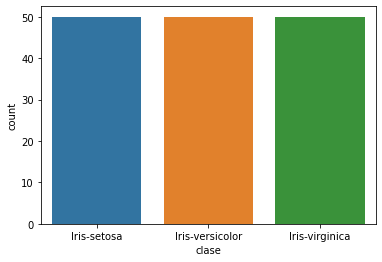

In [139]:
# Podemos hacer un gráfico de barras simple con la funcion countplot
# La funcion hace un recuento de cada uno de los grupos y lo representa

# Si no especificamos hue nos devuelve un recuento de cada clase
sns.countplot(data = iris, x = "clase", 
              #hue="sep_grande"
             )

<AxesSubplot:xlabel='clase', ylabel='count'>

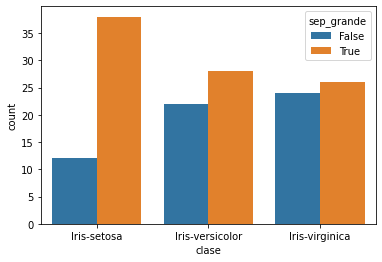

In [140]:
# Si especificamos hue, nos separa por cada una de las clases

sns.countplot(data = iris, x = "clase", 
              hue="sep_grande"
             )

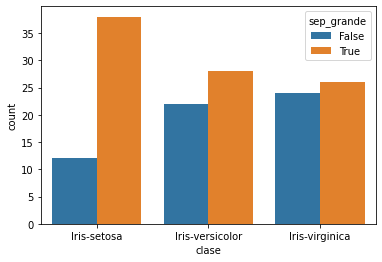

In [143]:
# Si nos interesa el gráfico podemos guardarlo (se nos guardará en la carpeta donde estamos trabajando)

figura = sns.countplot(data = iris, x = "clase",hue="sep_grande")

# Lo guardamos con el siguiente comando 

figura.figure.savefig("grafico_barras.png")

<AxesSubplot:xlabel='l_sepalos', ylabel='a_sepalos'>

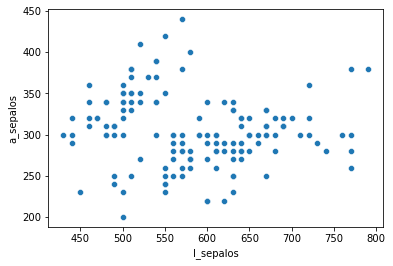

In [147]:
# Podemos realizar una representación de nube de puntos

sns.scatterplot(data=iris, x="l_sepalos", y="a_sepalos")

<AxesSubplot:xlabel='l_sepalos', ylabel='a_sepalos'>

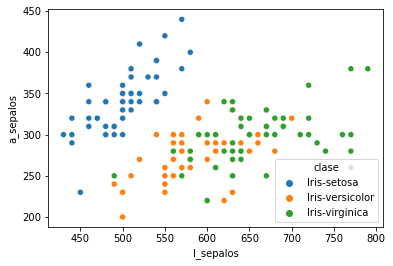

In [149]:
# Si queremos que se divida por cada clase

sns.scatterplot(data = iris, x = "l_sepalos", y = "a_sepalos", hue = "clase")

¿Qué pasa si queremos guardar las gráficas que hemos creado con anterioridad? Por ejemplo si queremos guardarlas para publicarlas. 

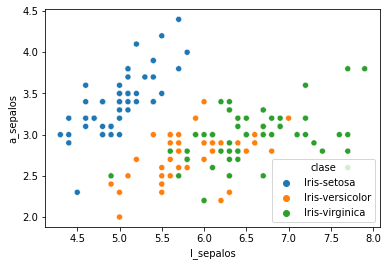

In [12]:
# Es relativamente fácil
# Si queremos guardar el gráfico anterior tenemos que guardarla como una variable

grafico=sns.scatterplot(data = iris, x = "l_sepalos", y = "a_sepalos", hue = "clase")

# Posteriormente lo guardamos con .figure.savefig()

grafico.figure.savefig("Grafico_puntos.png")

¿Donde podemos encontrar estos archivos que acabamos de crear? Fácilmente los podremos encontrar dentro del directorio de trabajo en el que estamos ejecutando todo el programa. ¿Y qué es eso del directorio de trabajo?

In [3]:
import os

cwd = os.getcwd()
print(cwd)

/Users/adrianvalls/Desktop/Nuevo Curso NNTT


¿Cómo podéis llegar hasta alli? Podéis ir navegando de forma manual por cada una de las carpetas hasta llegar donde tenéis el archivo. Otra opcion es en el navegador de carpetas de windows directamente pegar la dirección. Si sois usuarios de mac abrid una ventan de Finder > Ir > Ir a la carpeta ... > pegad ahí la carpeta y os abrirá donde se encuentran los archivos que acabamos de grabar